In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
#Data Conversion:
df = pd.read_csv("loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [21]:
#Dataset Overview:
from IPython.display import display
import pandas as pd

def dataset_overview(df):
    # Create a styled header
    from IPython.display import Markdown
    display(Markdown("### Dataset Overview"))
    
    # Display first 5 rows with styling
    display(Markdown("**First 5 rows:**"))
    display(df.head().style.set_caption("Sample Data").set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), 
                                         ('font-weight', 'bold'),
                                         ('text-align', 'center')]}
    ]))
    
    # Display dataset info in a more readable format
    display(Markdown("**Dataset Information:**"))
    info = pd.DataFrame({
        'Column': df.columns,
        'Non-Null Count': df.notna().sum(),
        'Null Count': df.isna().sum(),
        'Dtype': df.dtypes,
        'Unique Values': df.nunique()
    }).reset_index(drop=True)
    display(info.style.background_gradient(cmap='Blues', subset=['Null Count']))
    
    # Display descriptive statistics with formatting
    display(Markdown("**Descriptive Statistics:**"))
    display(df.describe().T.style\
           .background_gradient(cmap='YlOrBr', subset=['mean', '50%'])\
           .background_gradient(cmap='Greens', subset=['min', 'max']))
    
    # Additional useful metrics
    display(Markdown("**Additional Information:**"))
    display(pd.DataFrame({
        'Metric': ['Total Rows', 'Total Columns', 'Total Missing Values', 
                   'Memory Usage', 'Duplicate Rows'],
        'Value': [df.shape[0], df.shape[1], df.isna().sum().sum(),
                  df.memory_usage(deep=True).sum() / (1024**2), 
                  df.duplicated().sum()]
    }).style.hide(axis='index'))

# Usage
dataset_overview(df)

### Dataset Overview

**First 5 rows:**

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0,2,0,0,94,296,5,478,25,175,224,80,0
1,1,0,1,1,39,119,3,117,28,22,85,33,1
2,2,3,0,0,89,294,9,206,72,45,330,127,1
3,3,3,0,0,80,304,3,167,183,33,230,79,1
4,4,5,1,1,96,239,9,82,125,82,291,50,1


**Dataset Information:**

,Column,Non-Null Count,Null Count,Dtype,Unique Values
0,loan_id,4269,0,int64,4269
1,no_of_dependents,4269,0,int64,6
2,education,4269,0,int64,2
3,self_employed,4269,0,int64,2
4,income_annum,4269,0,int64,98
5,loan_amount,4269,0,int64,378
6,loan_term,4269,0,int64,10
7,cibil_score,4269,0,int64,601
8,residential_assets_value,4269,0,int64,278
9,commercial_assets_value,4269,0,int64,188


**Descriptive Statistics:**

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.000000,2134.000000,1232.498479,0.000000,1067.000000,2134.000000,3201.000000,4268.000000
no_of_dependents,4269.000000,2.498712,1.695910,0.000000,1.000000,3.000000,4.000000,5.000000
education,4269.000000,0.497775,0.500054,0.000000,0.000000,0.000000,1.000000,1.000000
self_employed,4269.000000,0.503631,0.500045,0.000000,0.000000,1.000000,1.000000,1.000000
income_annum,4269.000000,48.591239,28.068398,0.000000,25.000000,49.000000,73.000000,97.000000
loan_amount,4269.000000,148.290466,90.324568,0.000000,74.000000,142.000000,212.000000,377.000000
loan_term,4269.000000,4.450223,2.854594,0.000000,2.000000,4.000000,7.000000,9.000000
cibil_score,4269.000000,299.936051,172.430401,0.000000,153.000000,300.000000,448.000000,600.000000
residential_assets_value,4269.000000,75.667838,64.864539,0.000000,23.000000,57.000000,114.000000,277.000000
commercial_assets_value,4269.000000,49.712345,43.831312,0.000000,13.000000,37.000000,76.000000,187.000000


**Additional Information:**

Metric,Value
Total Rows,4269.000000
Total Columns,13.000000
Total Missing Values,0.000000
Memory Usage,0.423534
Duplicate Rows,0.000000


In [6]:
#Cleaning and Processing the Data

# Normalizing Field Names
df.columns = df.columns.str.strip().str.lower()

In [7]:
# Verify column names
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [41]:
# Identify the target column
possible_target_columns = ['loan_status', 'loan_approval_status']
target_column = None
for col in possible_target_columns:
    if col in df.columns:
        target_column = col
        break

if target_column is None:
    raise KeyError("Target column not found in dataset! Available columns: " + str(df.columns))

In [9]:
# Handling missing values
imputer = SimpleImputer(strategy='most_frequent')
df[df.columns] = imputer.fit_transform(df)

In [10]:
# Encoding categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [11]:

# Feature-target split
X = df.drop(columns=[target_column])
y = df[target_column]

In [12]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
#Analysis of the Data:

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
# Predictions
y_pred = model.predict(X_test)

In [16]:
# Assuming y_test and y_pred are NumPy arrays or lists
correct_predictions = sum(1 for true, pred in zip(y_test, y_pred) if true == pred)
total_predictions = len(y_test)
manual_accuracy = correct_predictions / total_predictions

print(f"Manual Accuracy: {manual_accuracy:.2f}")


Manual Accuracy: 0.98


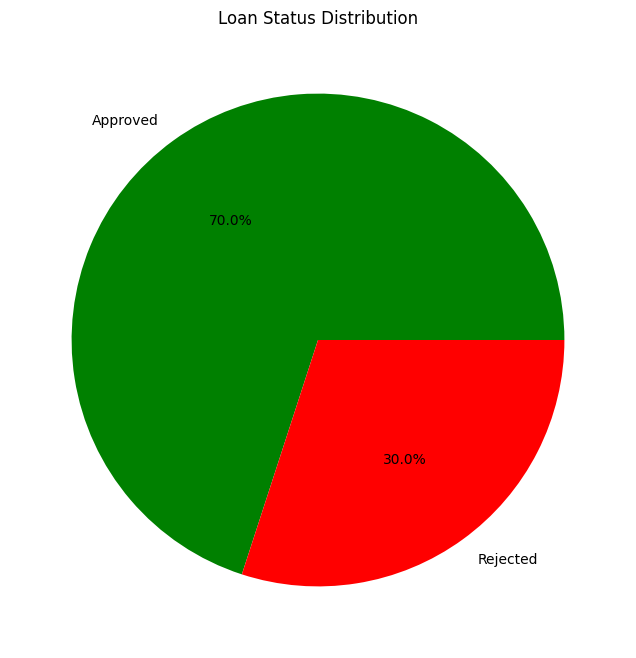

In [44]:
# short Loan Distribution 
df[target_column].value_counts().plot.pie(figsize=(8,8), autopct='%1.1f%%', colors=['green','red'], title='Loan Status Distribution')
plt.ylabel('')
plt.show()

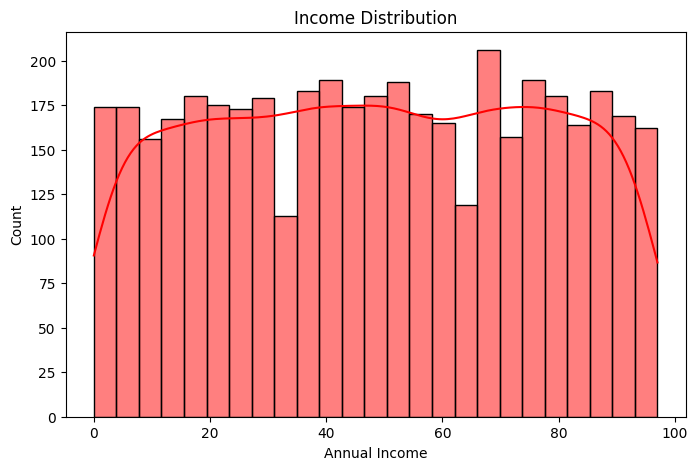

In [29]:
# Income Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['income_annum'], bins=25, kde=True, color='red')
plt.title("Income Distribution")
plt.xlabel("Annual Income")
plt.show()

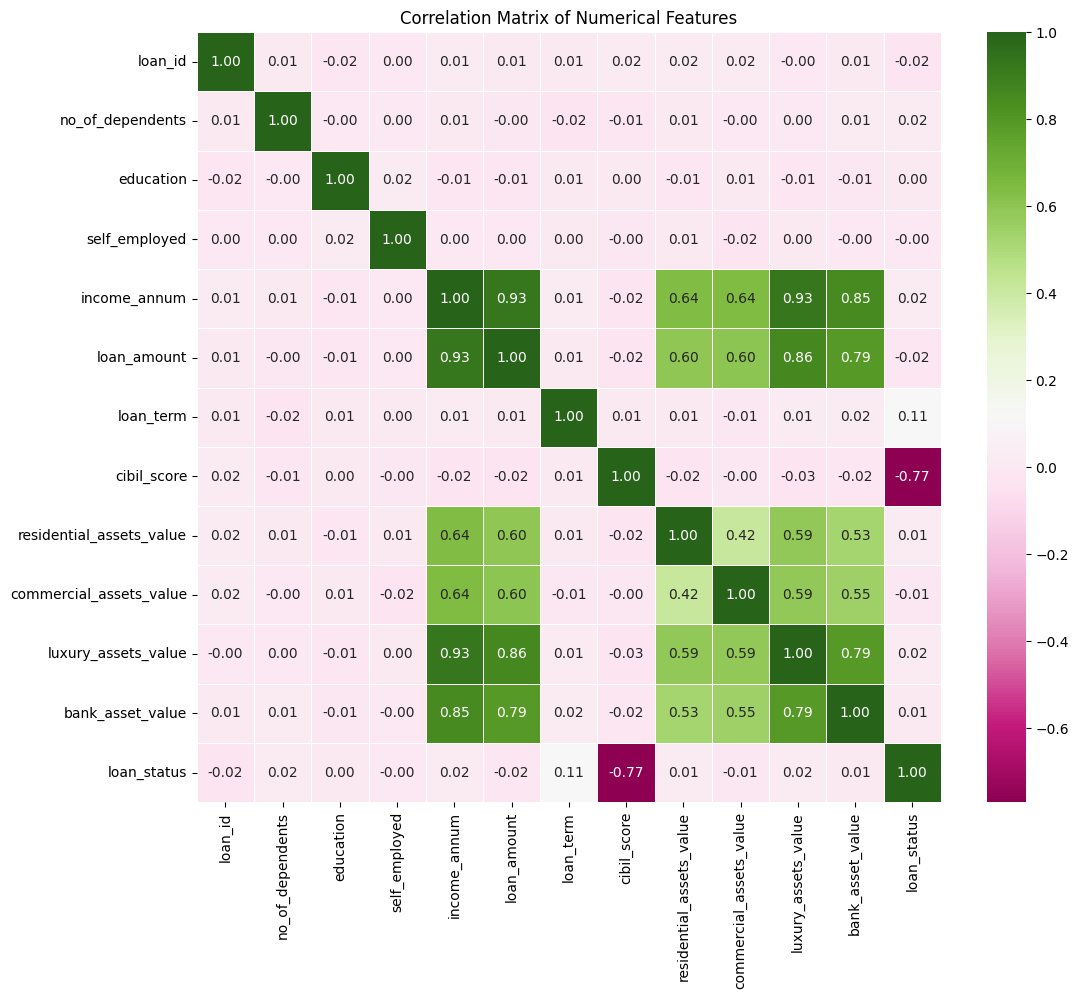

In [33]:
#Correlation Matix
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


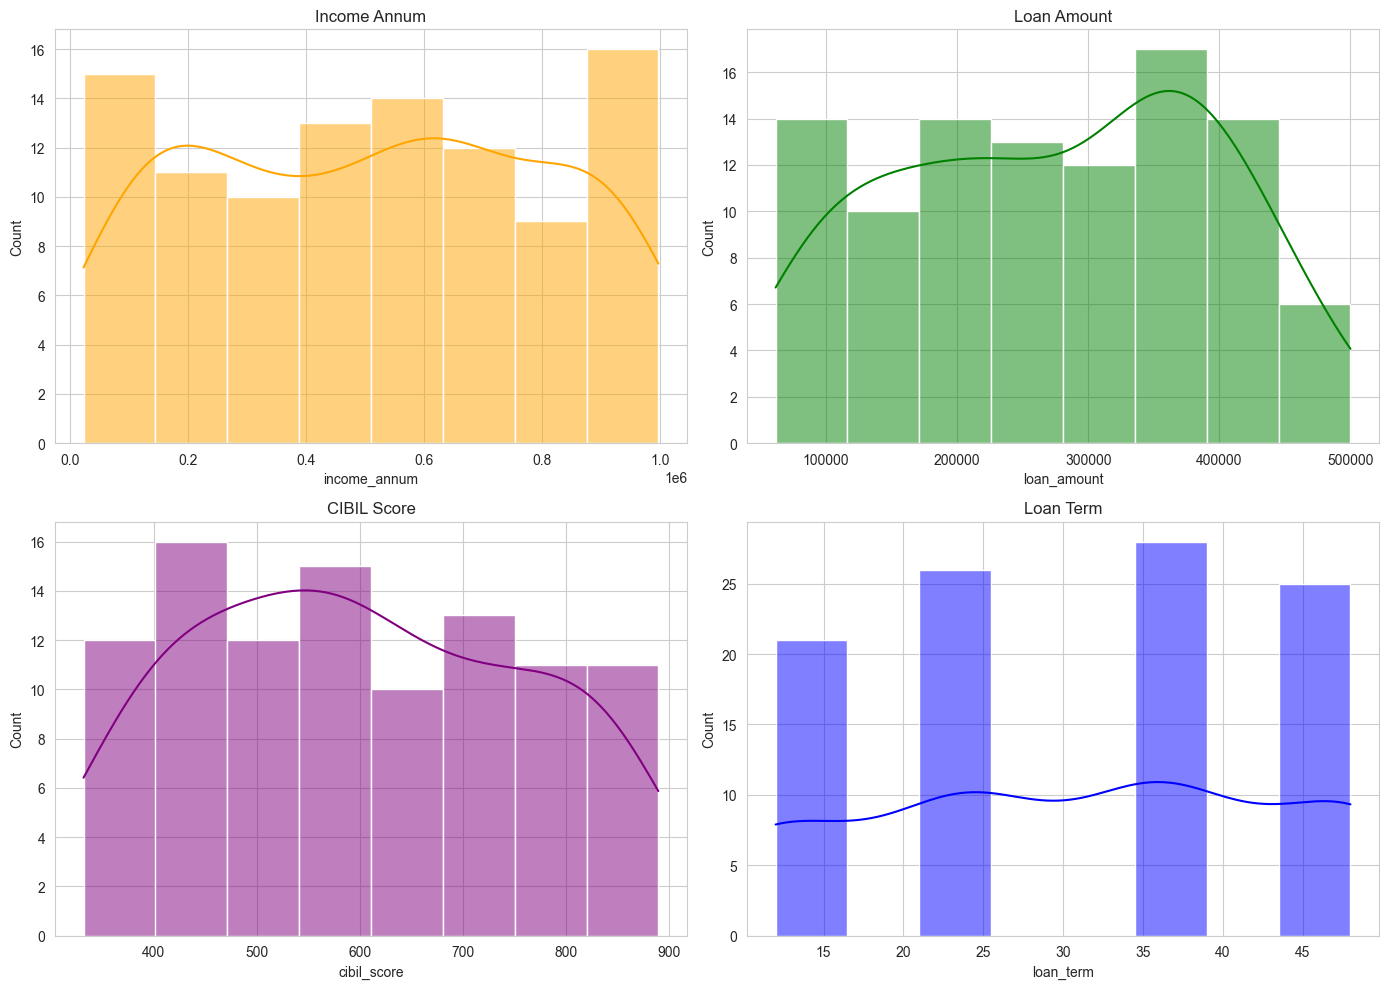

In [18]:

# Histograms for key numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['income_annum'], kde=True, ax=axes[0,0], color='orange')
axes[0,0].set_title('Income Annum')

sns.histplot(df['loan_amount'], kde=True, ax=axes[0,1], color='green')
axes[0,1].set_title('Loan Amount')

sns.histplot(df['cibil_score'], kde=True, ax=axes[1,0], color='purple')
axes[1,0].set_title('CIBIL Score')

sns.histplot(df['loan_term'], kde=True, ax=axes[1,1], color='blue')
axes[1,1].set_title('Loan Term')

plt.tight_layout()
plt.show()


C:\Users\Hamza\AppData\Local\Temp\ipykernel_32728\2037554204.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[target_column], y=df['cibil_score'], palette=custom_palette)


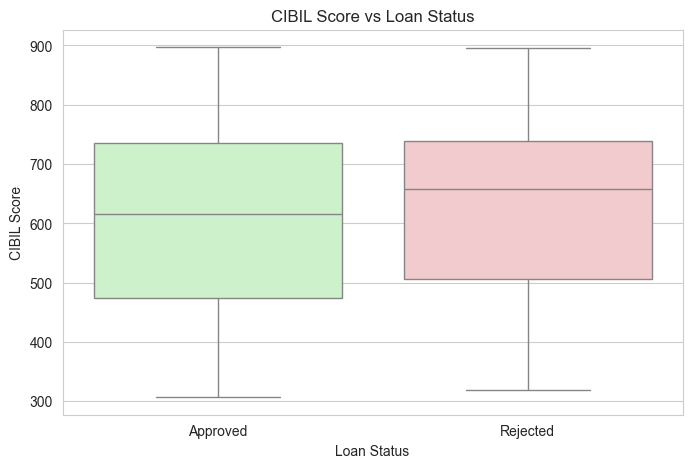

In [19]:

data = {
    'cibil_score': np.random.randint(300, 900, 200),
    'loan_status': np.random.choice(['Approved', 'Rejected'], 200, p=[0.7, 0.3])
}
df = pd.DataFrame(data)

target_column = 'loan_status'
custom_palette = {
    'Approved': '#C8F7C5', 
    'Rejected': '#F7C5C8' ,  
}

# CIBIL Score vs Loan Status - with custom color
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[target_column], y=df['cibil_score'], palette=custom_palette)
plt.title("CIBIL Score vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("CIBIL Score")
plt.show()


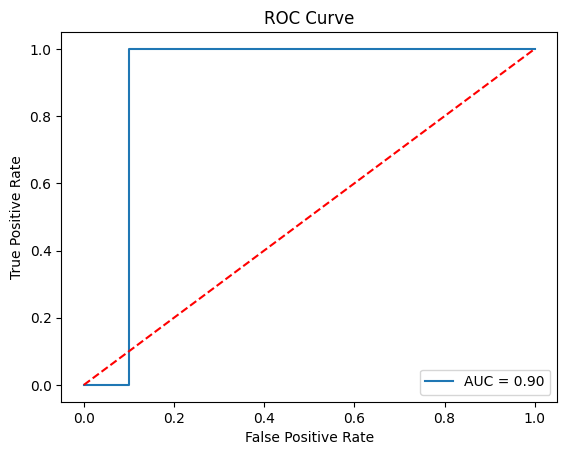

In [57]:
# Receiver operating characteristics(ROC) Curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_pred_prob = model.predict_proba(X_test)[:, 1]  
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
# Plotting
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()